In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

% matplotlib inline

In [2]:
# Import the image using imread 
file = "MarshOrchid.jpg"
imag = mpimg.imread(file)

In [3]:
# It is useful to see the dimensions of the image
print(imag.shape)

(5528, 3685, 3)


<function matplotlib.pyplot.show>

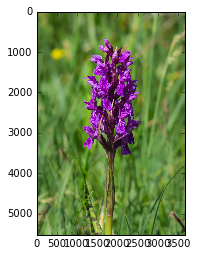

In [4]:
# Plot to make sure it looks okay
plt.imshow(imag)
plt.show

In [5]:
# Now we will manipulate the image using tensor flow
x = tf.Variable(imag,name='x')
model = tf.initialize_all_variables()

<function matplotlib.pyplot.show>

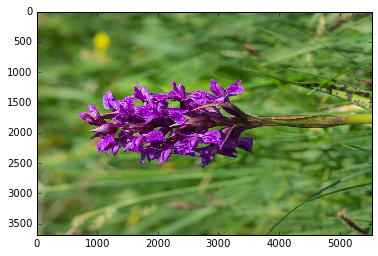

In [6]:
# We can then start the session
with tf.Session() as sess:
    x = tf.transpose(x,perm=[1,0,2])
    sess.run(model)
    result = sess.run(x)

plt.imshow(result)
plt.show

<function matplotlib.pyplot.show>

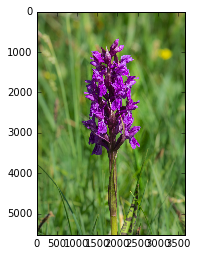

In [7]:
# Similarly we can flip from left to right using the tensor flow function reverse_sequence
height, width, depth = imag.shape
x = tf.Variable(imag,name='x')
model = tf.initialize_all_variables()

with tf.Session() as sess:
    x = tf.reverse_sequence(x, [width] * height, 1, batch_dim=0)
    sess.run(model)
    result = sess.run(x)
    
plt.imshow(result)
plt.show

<function matplotlib.pyplot.show>

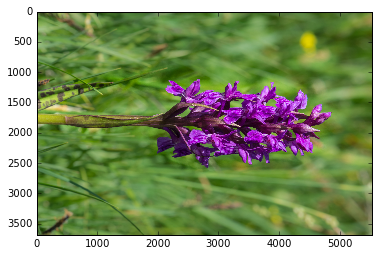

In [8]:
# We can now combine the transpose and the flip to rotate the image clockwise
height, width, depth = imag.shape
x = tf.Variable(imag,name='x')
model = tf.initialize_all_variables()

with tf.Session() as sess:
    x = tf.transpose(x,perm=[1,0,2])
    x = tf.reverse_sequence(x, [height] * width, 1, batch_dim=0) # note that transposing changes dimensions
    sess.run(model)
    result = sess.run(x)
    
plt.imshow(result)
plt.show

In [9]:
# Here is an example which shows how to extract the width
# of the image using TensorFlow rather than having it predefined

x = tf.constant(imag,name='x')
width = tf.Variable(tf.zeros([1]))

model = tf.initialize_all_variables()

with tf.Session() as sess:
    width = tf.shape(x)[1]
    sess.run(model)
    result = sess.run(width)


print('width is :')
print(result)

width is :
3685
